# Forecasting Rice Purchase Needs 🍚

> **Importing Libraries** 📚
> 
> Importing the necessary libraries for data manipulation (`pandas`, `numpy`), model creation and evaluation (`sklearn`), and data visualization (`matplotlib`, `seaborn`).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

> **Create the Dataset** 🗂️
> 
> Generate a random dataset with variables that influence the need to purchase rice. The target variable `PurchaseNeeded` is created based on simple rules considering factors like days since the last purchase and weather conditions.

In [2]:
np.random.seed(42)  # For reproducible results

# Generate the data
data_size = 1000
data = {
    'DaysSinceLastPurchase': np.random.randint(1, 60, size=data_size),
    'AverageTemperature': np.random.uniform(15, 35, size=data_size),
    'RelativeHumidity': np.random.uniform(40, 90, size=data_size),
    'WeeklySales': np.random.randint(10, 200, size=data_size),
    'UpcomingHoliday': np.random.randint(0, 2, size=data_size),
}

# Create a target variable (1 = Purchase Needed, 0 = Not Needed)
data['PurchaseNeeded'] = ((data['DaysSinceLastPurchase'] > 30) & 
                          (data['AverageTemperature'] > 25) & 
                          (data['RelativeHumidity'] < 60)) | \
                          (data['WeeklySales'] > 100)
data['PurchaseNeeded'] = data['PurchaseNeeded'].astype(int)

df = pd.DataFrame(data)

## Exploratory Data Analysis 🔍

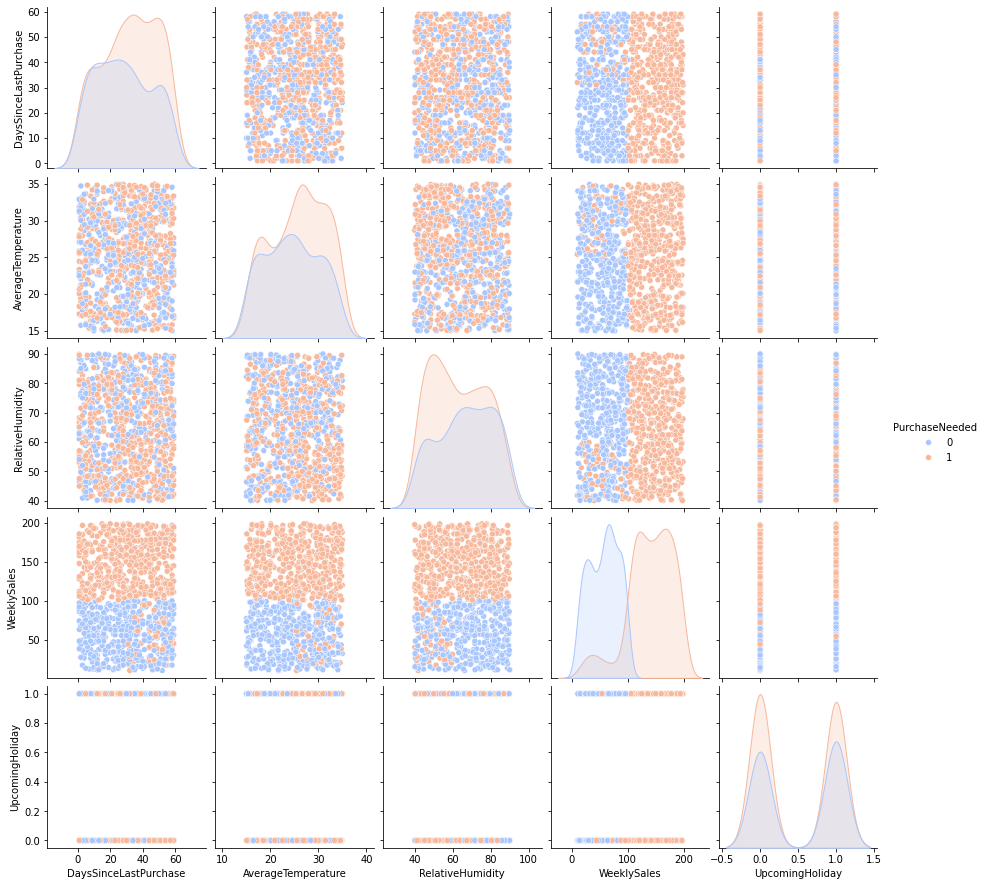

       DaysSinceLastPurchase  AverageTemperature  RelativeHumidity  \
count            1000.000000         1000.000000       1000.000000   
mean               30.582000           25.236963         64.585452   
std                17.024838            5.669820         14.492265   
min                 1.000000           15.004750         40.009420   
25%                16.000000           20.455900         51.691456   
50%                31.000000           25.606195         64.495308   
75%                45.000000           29.996753         77.201642   
max                59.000000           34.987070         89.985690   

       WeeklySales  UpcomingHoliday  PurchaseNeeded  
count  1000.000000      1000.000000     1000.000000  
mean    105.043000         0.503000        0.581000  
std      53.969305         0.500241        0.493642  
min      10.000000         0.000000        0.000000  
25%      61.000000         0.000000        0.000000  
50%     105.000000         1.000000        1.

In [3]:
# Exploratory Data Analysis
sns.pairplot(df, hue='PurchaseNeeded', palette='coolwarm')
plt.show()

# Descriptive Statistics
print(df.describe())

> **Exploratory Data Analysis** 🔍
> 
> Using Seaborn’s `pairplot` to visualize relationships between variables with respect to the target variable `PurchaseNeeded`. Descriptive statistics help in understanding the distribution of the data.

In [4]:
# Data Prep
# Separate independent and dependent variables
X = df[['DaysSinceLastPurchase', 'AverageTemperature', 'RelativeHumidity', 'WeeklySales', 'UpcomingHoliday']]
y = df['PurchaseNeeded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

> **Data Preparation** 🛠️ Separate the independent variables (`X`) from the dependent variable (`y`). 
The dataset is split into training and testing sets, and the data is normalized to improve the model's performance.

## Create and Train the Model 🤖

In [5]:
# Create and train the model
# Using Logistic Regression to predict the need to purchase rice. 
# Increase the maximum number of iterations to ensure model convergence.
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Evaluate the Model 📊

> **Evaluate the Model** 📊
> 
> Assess the model's performance using accuracy and a classification report that includes precision, recall, and F1-score, also display a normalized confusion matrix for a better understanding of the results.

Model Accuracy: 0.8866666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       134
           1       0.89      0.90      0.90       166

    accuracy                           0.89       300
   macro avg       0.89      0.88      0.89       300
weighted avg       0.89      0.89      0.89       300



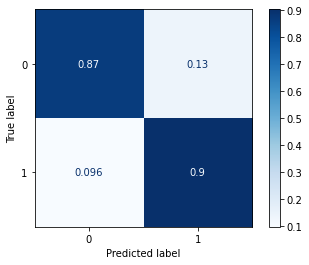

In [6]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues', normalize='true')
plt.show()

## Visualize Feature Importances 🔍📈

/tmp/ipykernel_10022/2890586521.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis', hue=None, legend=False)


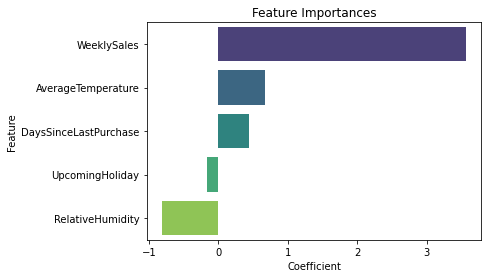

In [9]:
# Feature importances
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis', hue=None, legend=False)
plt.title('Feature Importances')
plt.show()

> Importance of each feature for the Logistic Regression model based on the coefficients. 
> This helps understand which variables most influence the decision to purchase rice.